In [123]:
# import the required libraries
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import torchvision
import torch.optim as optim
import torch.nn as nn

import math
from torch.utils.data import Dataset, DataLoader
import torch
from torchvision import transforms, utils
import cv2
import json
from sklearn.model_selection import train_test_split
from PIL import Image

In [124]:
device = 'cuda'
model = torchvision.models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(model.fc.in_features, 68*2)
model = model.type(torch.FloatTensor)
net = model.to(device)
net.load_state_dict(torch.load('saved_models/resnet18_pretrain_model2.pt'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [125]:
def get_key_points(image):

    image = torch.from_numpy(image.transpose((2, 0, 1)))
    image = image.type(torch.FloatTensor).to(device)

    # forward pass to get net outpu
    with torch.no_grad():
        output_pts = net(image[None,:,:,:])

    # reshape to batch_size x 68 x 2 pts
    output_pts = output_pts.view(output_pts.size()[0], 68, -1)*76.80763153436327+285.1921855457837

    return output_pts.cpu()

In [133]:
img1 = Image.open("train/images/04996.png").resize((512, 512))
img2 = Image.open("train/images/04997.png").resize((512, 512))

In [134]:
kpts1 = get_key_points(np.asarray(img1)/255)
kpts2 = get_key_points(np.asarray(img2)/255)

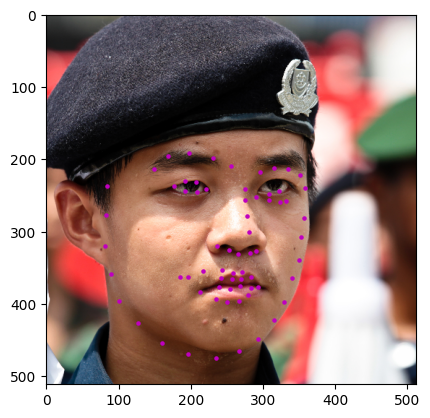

In [135]:
show_all_keypoints(img1, kpts1[0])

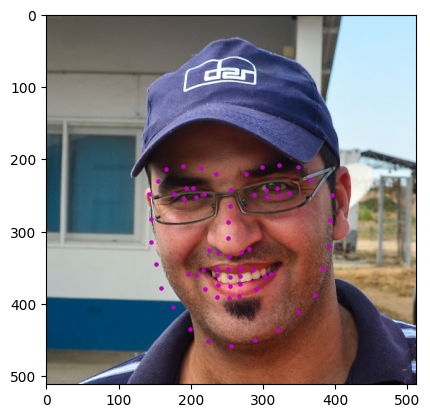

In [136]:
show_all_keypoints(img2, kpts2[0])